# Table of Contents

1. Data importing
2. Data checks and merging dataframes
3. PII privacy checks
4. Assign regions
5. Flag and exclude customers with less than 5 orders
6. Creating customer profile
* 6a. Age profile
* 6b. Income profile
* 6c. Number of Dependants profile
* 6d. Deparments profiles - Alcohol, Baby items, International items
7. Aggregate max, mean, and min variables on a customer-profile level for usage frequency and expenditure
* 7a. Age aggregation
* 7b. Income aggregation
* 7c. Number of Dependants aggregation
* 7d. Department based aggregation
8. Visualize distribution of profiles
* 8a. Age profile
* 8b. Income profile
* 8c. Number of Dependants profile
* 8d. Deparment based profiles

# 1. Data importing

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/jakubkondelka/Documents/CF_Instacart Basket Analysis'

In [4]:
ds = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fixed_final_task.pkl'))

In [5]:
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

# 2. Data checks and merging dataframes

In [5]:
ds.shape

(32404859, 34)

In [6]:
ds.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  evaluations             object  
 12  order_number            int64   
 13  orders_day_of_week      int64   
 14  order_hour_of_day       int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  product_name            object  
 20  aisle_id                int64   
 21  depart

In [8]:
departments.shape

(21, 2)

In [9]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
#Rename unnamed column to departmen_id, so that it can be merged
departments.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [7]:
#Deleting some columns
ds=ds.drop(columns=['_merge', 'aisle_id'])

In [8]:
#merging dataframes on department_id
merged=ds.merge(departments, on='department_id')

In [14]:
merged.shape

(32404859, 33)

In [15]:
merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low Spender,26.0,Non frequent customer,beverages
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Busiest day,Fewest orders,12,Regular customer,7.057534,Low Spender,26.0,Non frequent customer,beverages


In [9]:
# delete original dataframes
del ds, departments

# 3. PII privacy check

In [17]:
merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,beverages
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low Spender,26.0,Non frequent customer,beverages
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Busiest day,Fewest orders,12,Regular customer,7.057534,Low Spender,26.0,Non frequent customer,beverages


PII sensitive data are following columns : First_name, last_name, age, fam_status, income. We would want to point this out before we start doing anything with the data, so to make sure right approach is taking place i.e. delete these columns, replace them etc

# 4. Assign regions

In [10]:
# previously I used loc and conditions to do this. It took a lot of time. Now I will create lists

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']


In [11]:
# Create flags for each region

#Creating regional flags
merged.loc[merged['state'].isin(Northeast), 'region']='Northeast'
merged.loc[merged['state'].isin(West), 'region']='West'
merged.loc[merged['state'].isin(South), 'region']='South'
merged.loc[merged['state'].isin(Midwest), 'region']='Midwest'


In [22]:
merged.shape

(32404859, 34)

In [23]:
merged['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
#create a new dataframe with columns region and spender_flag
df_regions = merged[['region', 'Spender_flag']]

In [13]:
# aggregate regions based on count in spender_flag
df_regions.groupby(['region', 'Spender_flag']).agg({'Spender_flag': ['count']})

Spender_flag
                              count
region    Spender_flag             
Midwest   High Spender       155932
          Low Spender       7441350
Northeast High Spender       108180
          Low Spender       5614511
South     High Spender       209481
          Low Spender      10582194
West      High Spender       160271
          Low Spender       8132559

In [27]:
# Stats in each region to compare to the Spender_flag above
merged.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

#### Each region has many more low spenders than high spenders, that was expected.  South has the most high spenders and also the most low spenders. That can be because there are more states in the South than anywhere else.

In [14]:
# delete regions dataframe
del df_regions

# 5. Flag and exclude customers with less than 5 orders

In [15]:
# use loc to locate this condtion and create a new column, with flagged customers
merged.loc[merged['max_order'] < 5, 'Low Spender'] = 'YES'
merged.loc[merged['max_order'] >= 5, 'Low Spender'] = 'NO'

In [16]:
merged['Low Spender'].value_counts(dropna=False)

NO     30964564
YES     1440295
Name: Low Spender, dtype: int64

In [17]:
# create a dataset with customers who order less than 5 items
low_spenders=merged[merged['Low Spender']== 'YES']

In [18]:
#Exporting low_spenders dataset
low_spenders.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_spenders.pkl'))

In [19]:
# delete low_spenders
del low_spenders

In [20]:
# create a new dataset with customers who order more than 5 items 
iloveyou=merged[merged['Low Spender']=='NO']

In [21]:
iloveyou.shape

(30964564, 35)

In [22]:
# delete main dataset to reduce memory
del merged

In [23]:
# export iloveyou
iloveyou.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'iloveyou.pkl'))

# 6. Creating customer profiles

## 6a. Age profile 

There are 3 profiles as follows. Young have age < 30 Middle age have 30 <= age < 65, old folks have age <= 65 

In [24]:
# Profiling
iloveyou.loc[iloveyou['age']<30, 'age_profile']='Young'
iloveyou.loc[(iloveyou['age']>=30) & (iloveyou['age']<65), 'age_profile']='Middle aged'
iloveyou.loc[iloveyou['age']>=65, 'age_profile']='Old folks'

In [25]:
# check value counts for each group
iloveyou['age_profile'].value_counts(dropna=False)

Middle aged    16951417
Old folks       8195544
Young           5817603
Name: age_profile, dtype: int64

## 6b. Income profile

Based on division of income in US; Low = less than 52,250. Middle = 52,250 - 156,000. High = more than $156,000

In [26]:
iloveyou.loc[iloveyou['income']<52250, 'income_profile']='Low income'
iloveyou.loc[(iloveyou['income']>=52250) & (iloveyou['income']<156000), 'income_profile']='Middle income'
iloveyou.loc[iloveyou['income']>=156000, 'income_profile']='High income'

In [27]:
# check value counts
iloveyou['income_profile'].value_counts(dropna=False)

Middle income    24413893
Low income        3709025
High income       2841646
Name: income_profile, dtype: int64

## 6c. Number of dependants profile

Either has dependants (1+) or has no dependants

In [28]:
# creating flags  
iloveyou.loc[iloveyou['n_dependants']>0, 'dependant_profile']='dependants'
iloveyou.loc[iloveyou['n_dependants']==0,'dependant_profile']='no dependants'


In [29]:
# check values 
iloveyou['dependant_profile'].value_counts(dropna=False)

dependants       23224883
no dependants     7739681
Name: dependant_profile, dtype: int64

## 6d Deparmetns profiles

In [30]:
iloveyou['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Alcohol drinker profile

In [31]:
# Alcohol drinker if bought alcohol 1x (1) or not (0)
iloveyou['alcohol_flag']=[1 if x=='alcohol' else 0 for x in iloveyou['department']]
iloveyou['alcohol_flag']=iloveyou.groupby(['user_id'])['alcohol_flag'].transform(np.max)


In [32]:
#check values
iloveyou['alcohol_flag'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_flag, dtype: int64

### International buyer profile

In [33]:
# International buyer if bought international item at least 1x (1) or not (0)
iloveyou['international_flag']=[1 if x=='international' else 0 for x in iloveyou['department']]
iloveyou['international_flag']=iloveyou.groupby(['user_id'])['international_flag'].transform(np.max)

In [34]:
# check values
iloveyou['international_flag'].value_counts(dropna=False)

1    19161614
0    11802950
Name: international_flag, dtype: int64

### Baby stuff buyer profile

In [35]:
# Baby stuff buyer if bought baby stuff(1) or not (0)
iloveyou['baby_flag'] = [1 if x == 'babies' else 0 for x in iloveyou['department']]
iloveyou['baby_flag']=iloveyou.groupby(['user_id'])['baby_flag'].transform(np.max)


In [36]:
# check values
iloveyou['baby_flag'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_flag, dtype: int64

# 7. Aggregate max, mean, and min variables on a customer-profile level for usage frequency and expenditure

## 7a Age aggregation

In [37]:
# Aggregating max, min, mean
iloveyou.groupby(['age_profile']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency                prices              
                       mean  min   max       mean  min      max
age_profile                                                    
Middle aged        9.973800  0.0  30.0  11.927488  1.0  99999.0
Old folks          9.933025  0.0  30.0  11.757768  1.0  99999.0
Young              9.942566  0.0  30.0  12.198693  1.0  99999.0

In [38]:
# prices are wrong, fix it by marking them NaN
iloveyou.loc[iloveyou['prices'] >100, 'prices'] = np.nan

In [40]:
# run aggregate again
iloveyou.groupby(['age_profile']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                       mean  min   max      mean  min   max
age_profile                                                
Middle aged        9.973800  0.0  30.0  7.790509  1.0  25.0
Old folks          9.933025  0.0  30.0  7.796715  1.0  25.0
Young              9.942566  0.0  30.0  7.782198  1.0  25.0

## 7b Income aggregation

In [41]:
# Aggregating max, min, mean
iloveyou.groupby(['income_profile']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                          mean  min   max      mean  min   max
income_profile                                                
High income           9.771593  0.0  30.0  7.937780  1.0  25.0
Low income           10.471062  0.0  30.0  6.770280  1.0  25.0
Middle income         9.900660  0.0  30.0  7.928495  1.0  25.0

## 7c Dependants aggregation

In [42]:
# Aggregating max, min, mean
iloveyou.groupby(['dependant_profile']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                             mean  min   max      mean  min   max
dependant_profile                                                
dependants               9.963995  0.0  30.0  7.790937  1.0  25.0
no dependants            9.936569  0.0  30.0  7.789550  1.0  25.0

## 7d Department aggregations

### Alcohol drinker

In [43]:
# Aggregating max, min, mean
iloveyou.groupby(['alcohol_flag']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                        mean  min   max      mean  min   max
alcohol_flag                                                
0                   9.977038  0.0  30.0  7.791490  1.0  25.0
1                   9.712661  0.0  30.0  7.779533  1.0  25.0

### International items buyer

In [44]:
# Aggregating max, min, mean
iloveyou.groupby(['international_flag']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                              mean  min   max      mean  min   max
international_flag                                                
0                        11.505910  0.0  30.0  7.716673  1.0  25.0
1                         9.003146  0.0  30.0  7.836119  1.0  25.0

### Baby stuff buyer

In [45]:
# Aggregating max, min, mean
iloveyou.groupby(['baby_flag']).agg({'order_frequency':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_frequency               prices           
                     mean  min   max      mean  min   max
baby_flag                                                
0               10.731215  0.0  30.0  7.770758  1.0  25.0
1                8.287965  0.0  30.0  7.833353  1.0  25.0

In [46]:
# Export iloveyou
iloveyou.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'iloveyou.pkl'))

# 8. Visualize distribution of profiles

In [47]:
# Removing duplicate customers and creating a dataset with only unique users
truthbetold=iloveyou.drop_duplicates(subset='user_id')

In [48]:
truthbetold.shape

(162631, 41)

## 8a Age profile

Text(0, 0.5, 'Number of Customers')

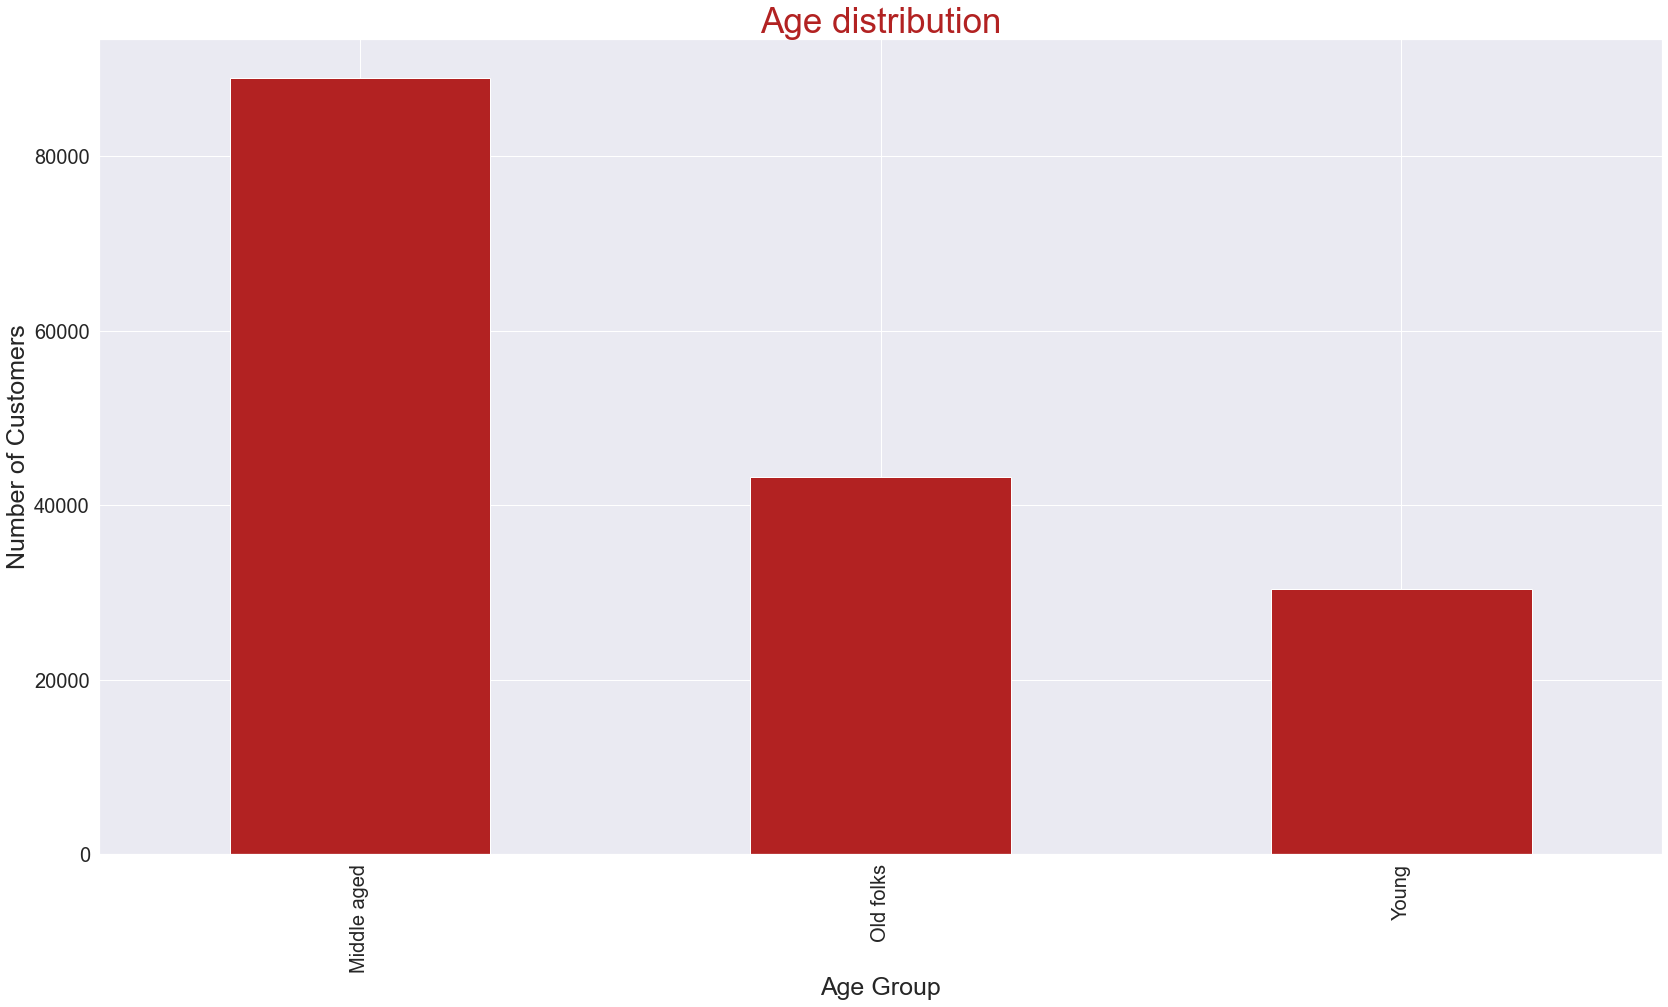

In [58]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})

# Bar chart for age distribution of customers
bargraph=truthbetold['age_profile'].value_counts().plot.bar(color='firebrick', fontsize=20)
plt.title('Age distribution', fontsize=35, color = 'firebrick')
plt.xlabel('Age Group', fontsize=25)
plt.ylabel('Number of Customers', fontsize=25)

In [57]:
# Export bar chart
bargraph.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_distribution.png'))

## 8b Income distribution

Text(0, 0.5, 'Income Group')

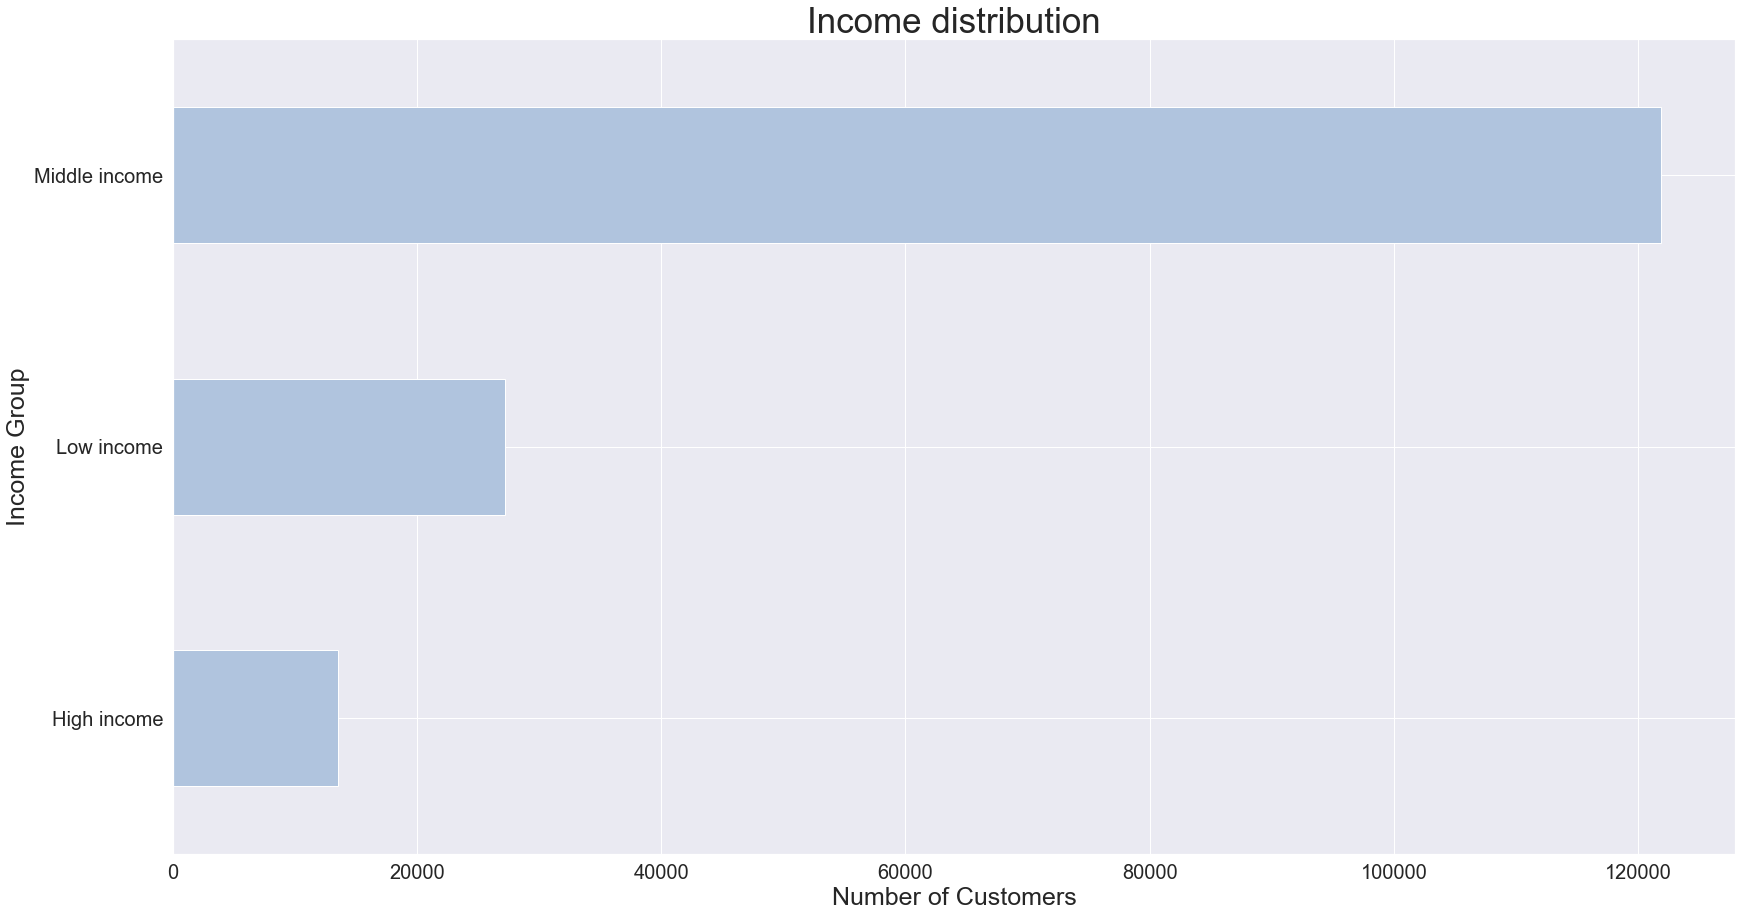

In [65]:
# Bar chart for age distribution of customers
bar=truthbetold['income_profile'].value_counts().sort_values().plot.barh(color='lightsteelblue', fontsize=20)
plt.title('Income distribution', fontsize=35)
plt.xlabel('Number of Customers', fontsize=25)
plt.ylabel('Income Group', fontsize=25)

In [66]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'incomeH_distribution.png'))

Text(0, 0.5, 'number of customers')

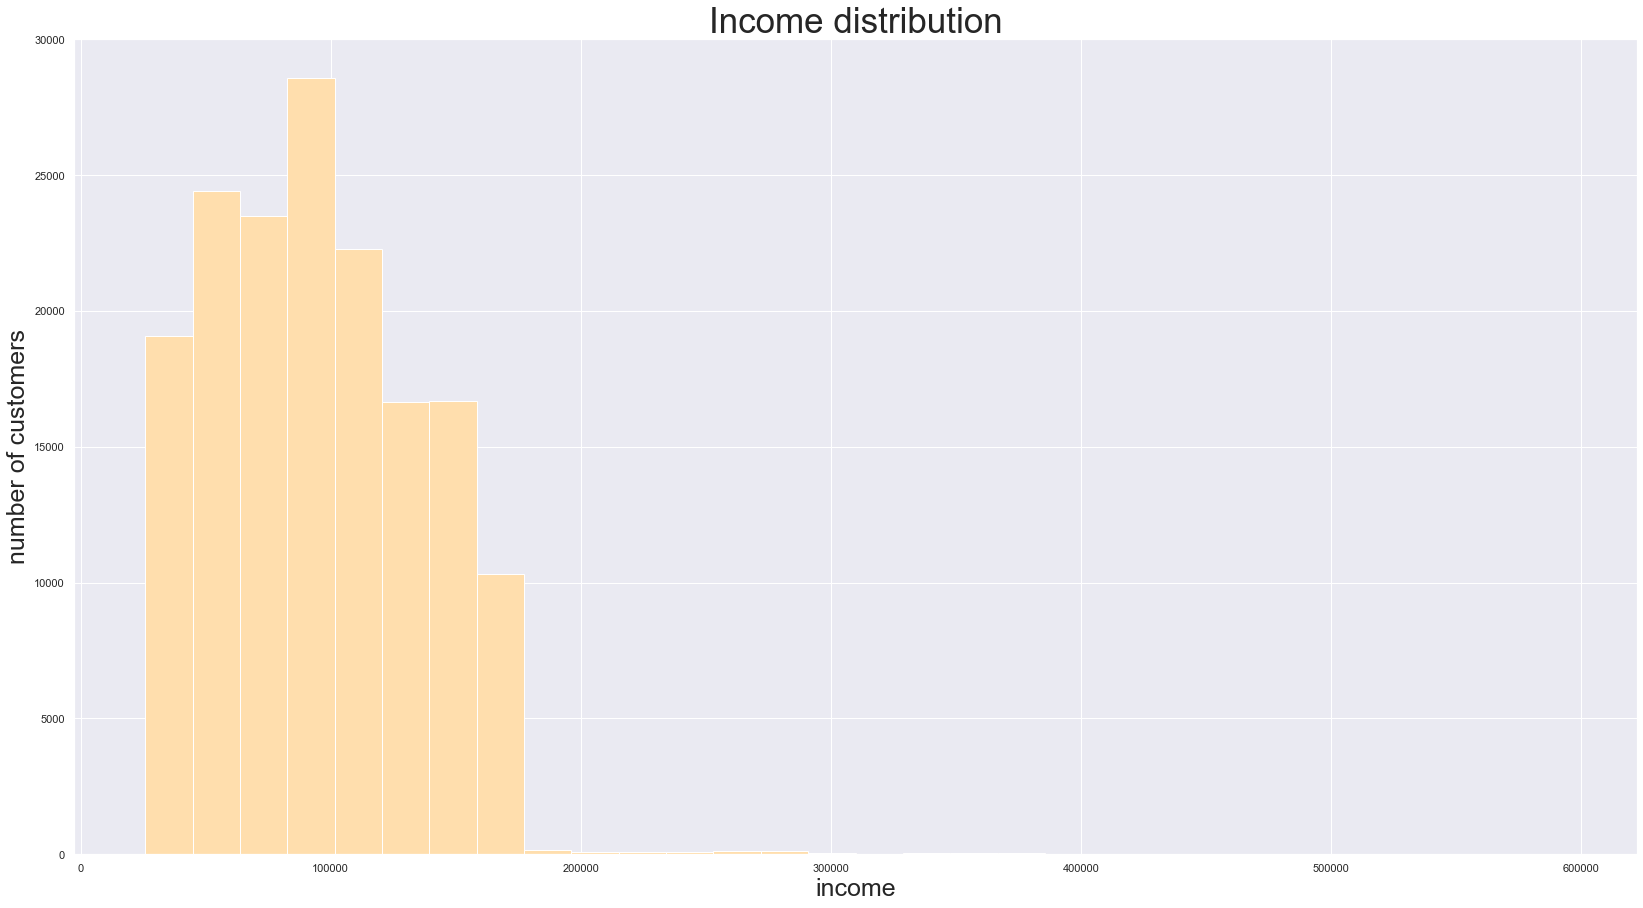

In [72]:
# historgram of income distribution
hist=truthbetold['income'].plot.hist(bins=30, color='navajowhite')
plt.title('Income distribution', fontsize=35)
plt.xlabel('income', fontsize=25)
plt.ylabel('number of customers', fontsize=25)

In [73]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_distribution_hist.png'))

## 8c Dependants distribution

In [75]:
# create a cross tab on number of dependants and family status. This will create a table which will be used to create visualization

dependant=pd.crosstab(truthbetold['fam_status'], truthbetold['dependant_profile'])
dependant

dependant_profile,dependants,no dependants
fam_status,,
divorced/widowed,0,13831
living with parents and siblings,7608,0
married,114296,0
single,0,26896


Text(0, 0.5, 'Family Status')

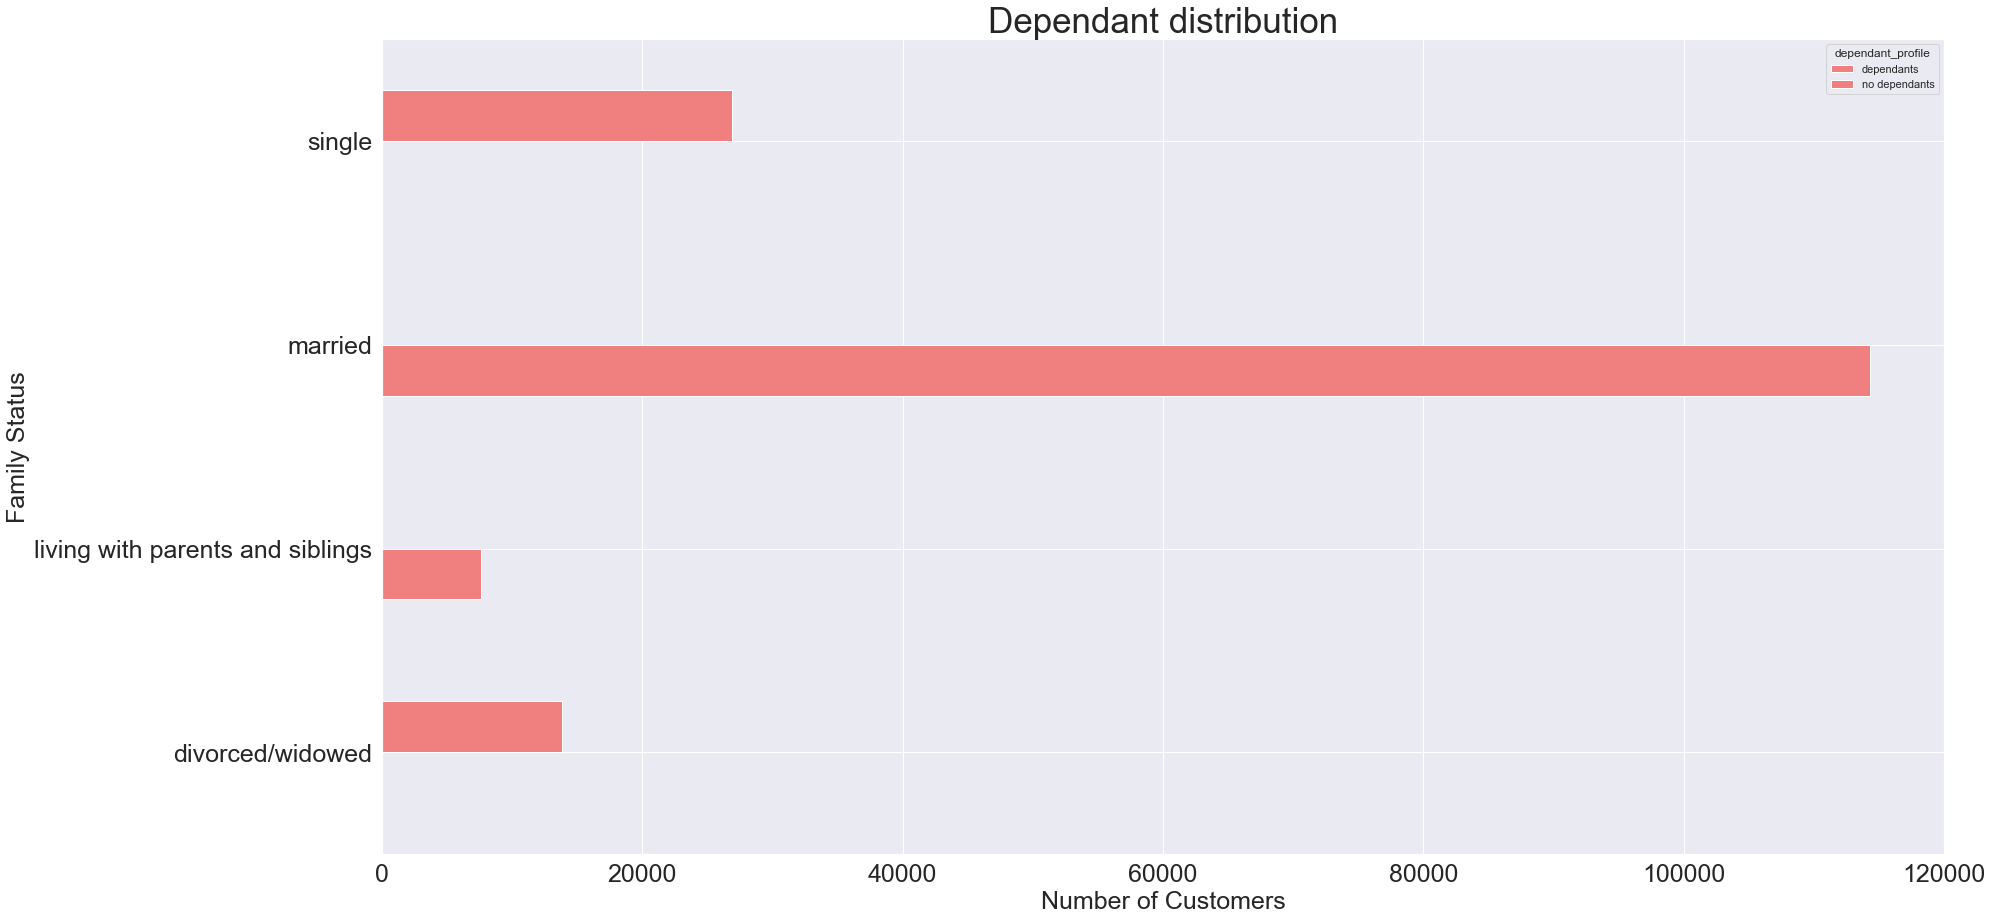

In [82]:
# Bar chart using dependant variable
bar2=dependant.plot.barh(color='lightcoral', fontsize=25)
plt.title('Dependant distribution', fontsize=35)
plt.xlabel('Number of Customers', fontsize=25)
plt.ylabel('Family Status', fontsize=25)


In [83]:
# Export bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dependant_distribution.png'))

## 8d Deparments distribution

### Alcohol profile

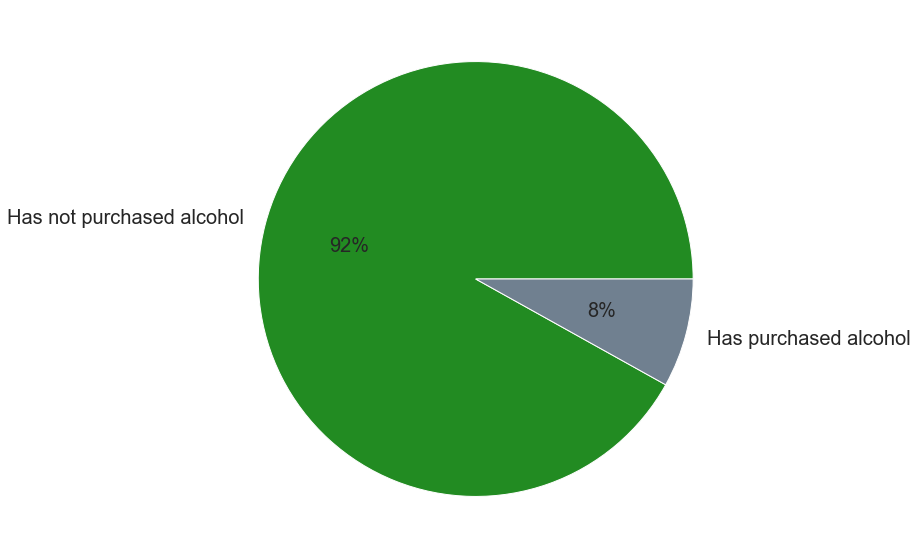

In [85]:

sns.set(rc = {'figure.figsize':(25,10)})

#Creating a pie chart for customers who purchased alcohol at least 1x

alcohol=truthbetold['alcohol_flag'].value_counts().plot.pie(label='', labels=['Has not purchased alcohol', 'Has purchased alcohol'],autopct=('%1.f%%'), colors=['forestgreen','slategrey'], textprops={'fontsize': 20})

In [86]:
# Export pie chart
alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'alcohol_flag.png'))

### Baby items profile

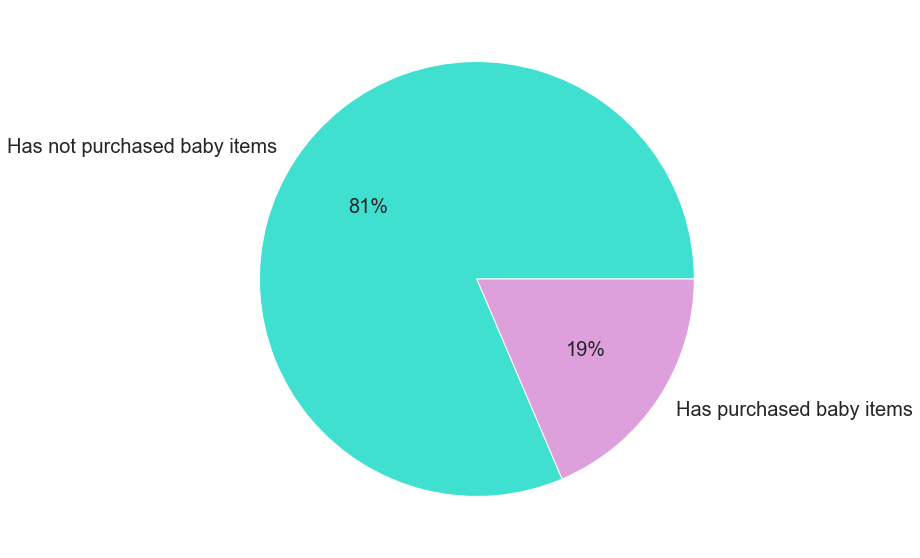

In [88]:
#Creating a pie chart for customers who purchased baby items at least 1x

babies=truthbetold['baby_flag'].value_counts().plot.pie(label='', labels=['Has not purchased baby items', 'Has purchased baby items'],autopct=('%1.f%%'), colors=['turquoise','plum'], textprops={'fontsize': 20})

In [90]:
# double check value counts
truthbetold['baby_flag'].value_counts()

0    132401
1     30230
Name: baby_flag, dtype: int64

In [91]:
# Export pie chart
babies.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'babies_flag.png'))

### International items buyer profile

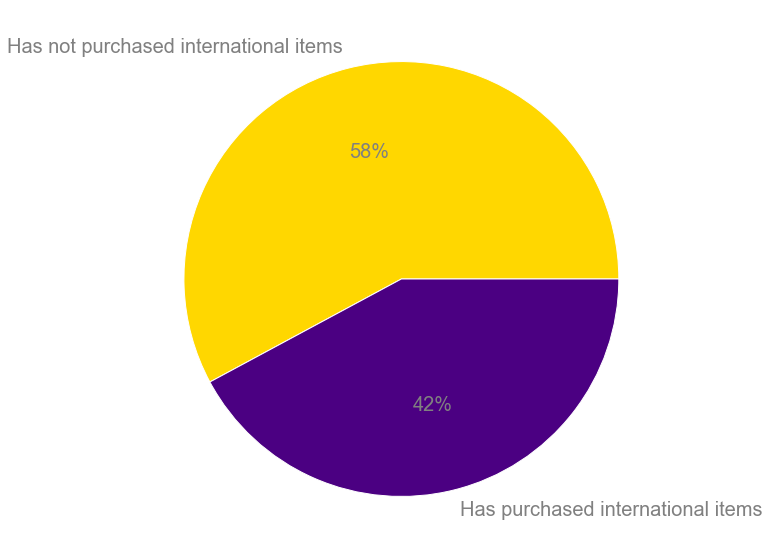

In [95]:
#Creating a pie chart for customers who purchased international items at least 1x

intern=truthbetold['international_flag'].value_counts().plot.pie(label='', labels=['Has not purchased international items', 'Has purchased international items'],autopct=('%1.f%%'), colors=['gold','indigo'], textprops={'fontsize': 20, 'color': 'grey'})

In [96]:
# Export pie chart
intern.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'international_flag.png'))

In [97]:
# Export truthbetold
truthbetold.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'truthbetold.pkl'))

In [98]:
truthbetold.shape

(162631, 41)